In [56]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from lcdblib.plotting import corrfunc

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs
from larval_gonad.config import memory

# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/combined_testis_force')

last updated: 2018-05-09 
Git hash: 84ff4b3494e65b215e783d8761aaf68c25e8a81b


In [5]:
pth = Path('../bulk-rnaseq-wf/data/rnaseq_samples')

In [27]:
# Import bulk data
dfs = []
for f in pth.glob('**/*featurecounts.txt'):
    sample = f.parent.stem
    df = pd.read_csv(f, sep='\t', skiprows=2, header=None, usecols=[0, 6])
    df.columns=['FBgn', f'{sample}']
    df.set_index('FBgn', inplace=True)
    dfs.append(df)
bulk = pd.concat(dfs, axis=1)

In [43]:
# Import scRNA-seq data
raw = nbconfig.seurat.get_raw()
rawT = raw.T
rawT['rep'] = np.array(rawT.index.str.split('_').tolist())[:, 0]
scRNAseq = rawT.groupby('rep').sum().T

In [66]:
norm = nbconfig.seurat.get_normalized_read_counts()

In [68]:
norm.T.loc[['rep3_TTGGCAAAGTACACCT', 'rep2_TTGGCAAAGTACACCT'], :]

FBgn,FBgn0031081,FBgn0031085,FBgn0040784,FBgn0031086,FBgn0031082,FBgn0031080,FBgn0053217,FBgn0052350,FBgn0024733,FBgn0040372,...,FBgn0045498,FBgn0001174,FBgn0053128,FBgn0051926,FBgn0051661,FBgn0028481,FBgn0031306,FBgn0031305,FBgn0031276,FBgn0040725
rep3_TTGGCAAAGTACACCT,0.0,0.0,0.636701,0.0,0.0,0.0,1.300383,0.0,3.81797,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rep2_TTGGCAAAGTACACCT,0.0,0.0,0.636701,0.0,0.0,0.0,1.300383,0.0,3.81797,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
rawT.loc[['rep3_TTGGCAAAGTACACCT', 'rep2_TTGGCAAAGTACACCT'], :]

FBgn,FBgn0031081,FBgn0031085,FBgn0040784,FBgn0031086,FBgn0031082,FBgn0031080,FBgn0053217,FBgn0052350,FBgn0024733,FBgn0040372,...,FBgn0001174,FBgn0053128,FBgn0051926,FBgn0051661,FBgn0028481,FBgn0031306,FBgn0031305,FBgn0031276,FBgn0040725,rep
cell_id,,,,,,,,,,,,,,,,,,,,,
rep3_TTGGCAAAGTACACCT,0,0,1,0,0,0,3,0,50,0,...,0,0,0,0,0,0,0,0,0,rep3
rep2_TTGGCAAAGTACACCT,0,0,1,0,0,0,3,0,50,0,...,0,0,0,0,0,0,0,0,0,rep2


In [44]:
scRNAseq.head()

rep,rep1,rep2,rep3
FBgn,,,
FBgn0031081,25,27,27
FBgn0031085,818,4336,4336
FBgn0040784,1295,3617,3617
FBgn0031086,4,6,6
FBgn0031082,176,793,793


In [45]:
bulk.head()

,E7_O3,A3_TF,B4_FO,E2_T3,E11_T4,B1_FO,E3_T3,C9_T1,B12_OCP,E1_T3,...,D6_T2,D9_O2,C2_TDT,D4_O1,B8_TCP,A8_OF,E6_O3,A11_FT,A6_OF,D11_O2
FBgn,,,,,,,,,,,,,,,,,,,,,
FBgn0031081,7,14,0,7,10,0,0,10,52,6,...,6,1,8,2,20,5,11,1,10,4
FBgn0052826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0031085,0,941,0,527,627,0,118,688,0,496,...,204,0,560,0,795,0,0,0,0,0
FBgn0062565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0031088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
tcp = bulk.loc[:, bulk.columns.str.contains('TCP')]
tdt = bulk.loc[:, bulk.columns.str.contains('TDT')]

In [52]:
dat = scRNAseq.join(tcp, how='left')

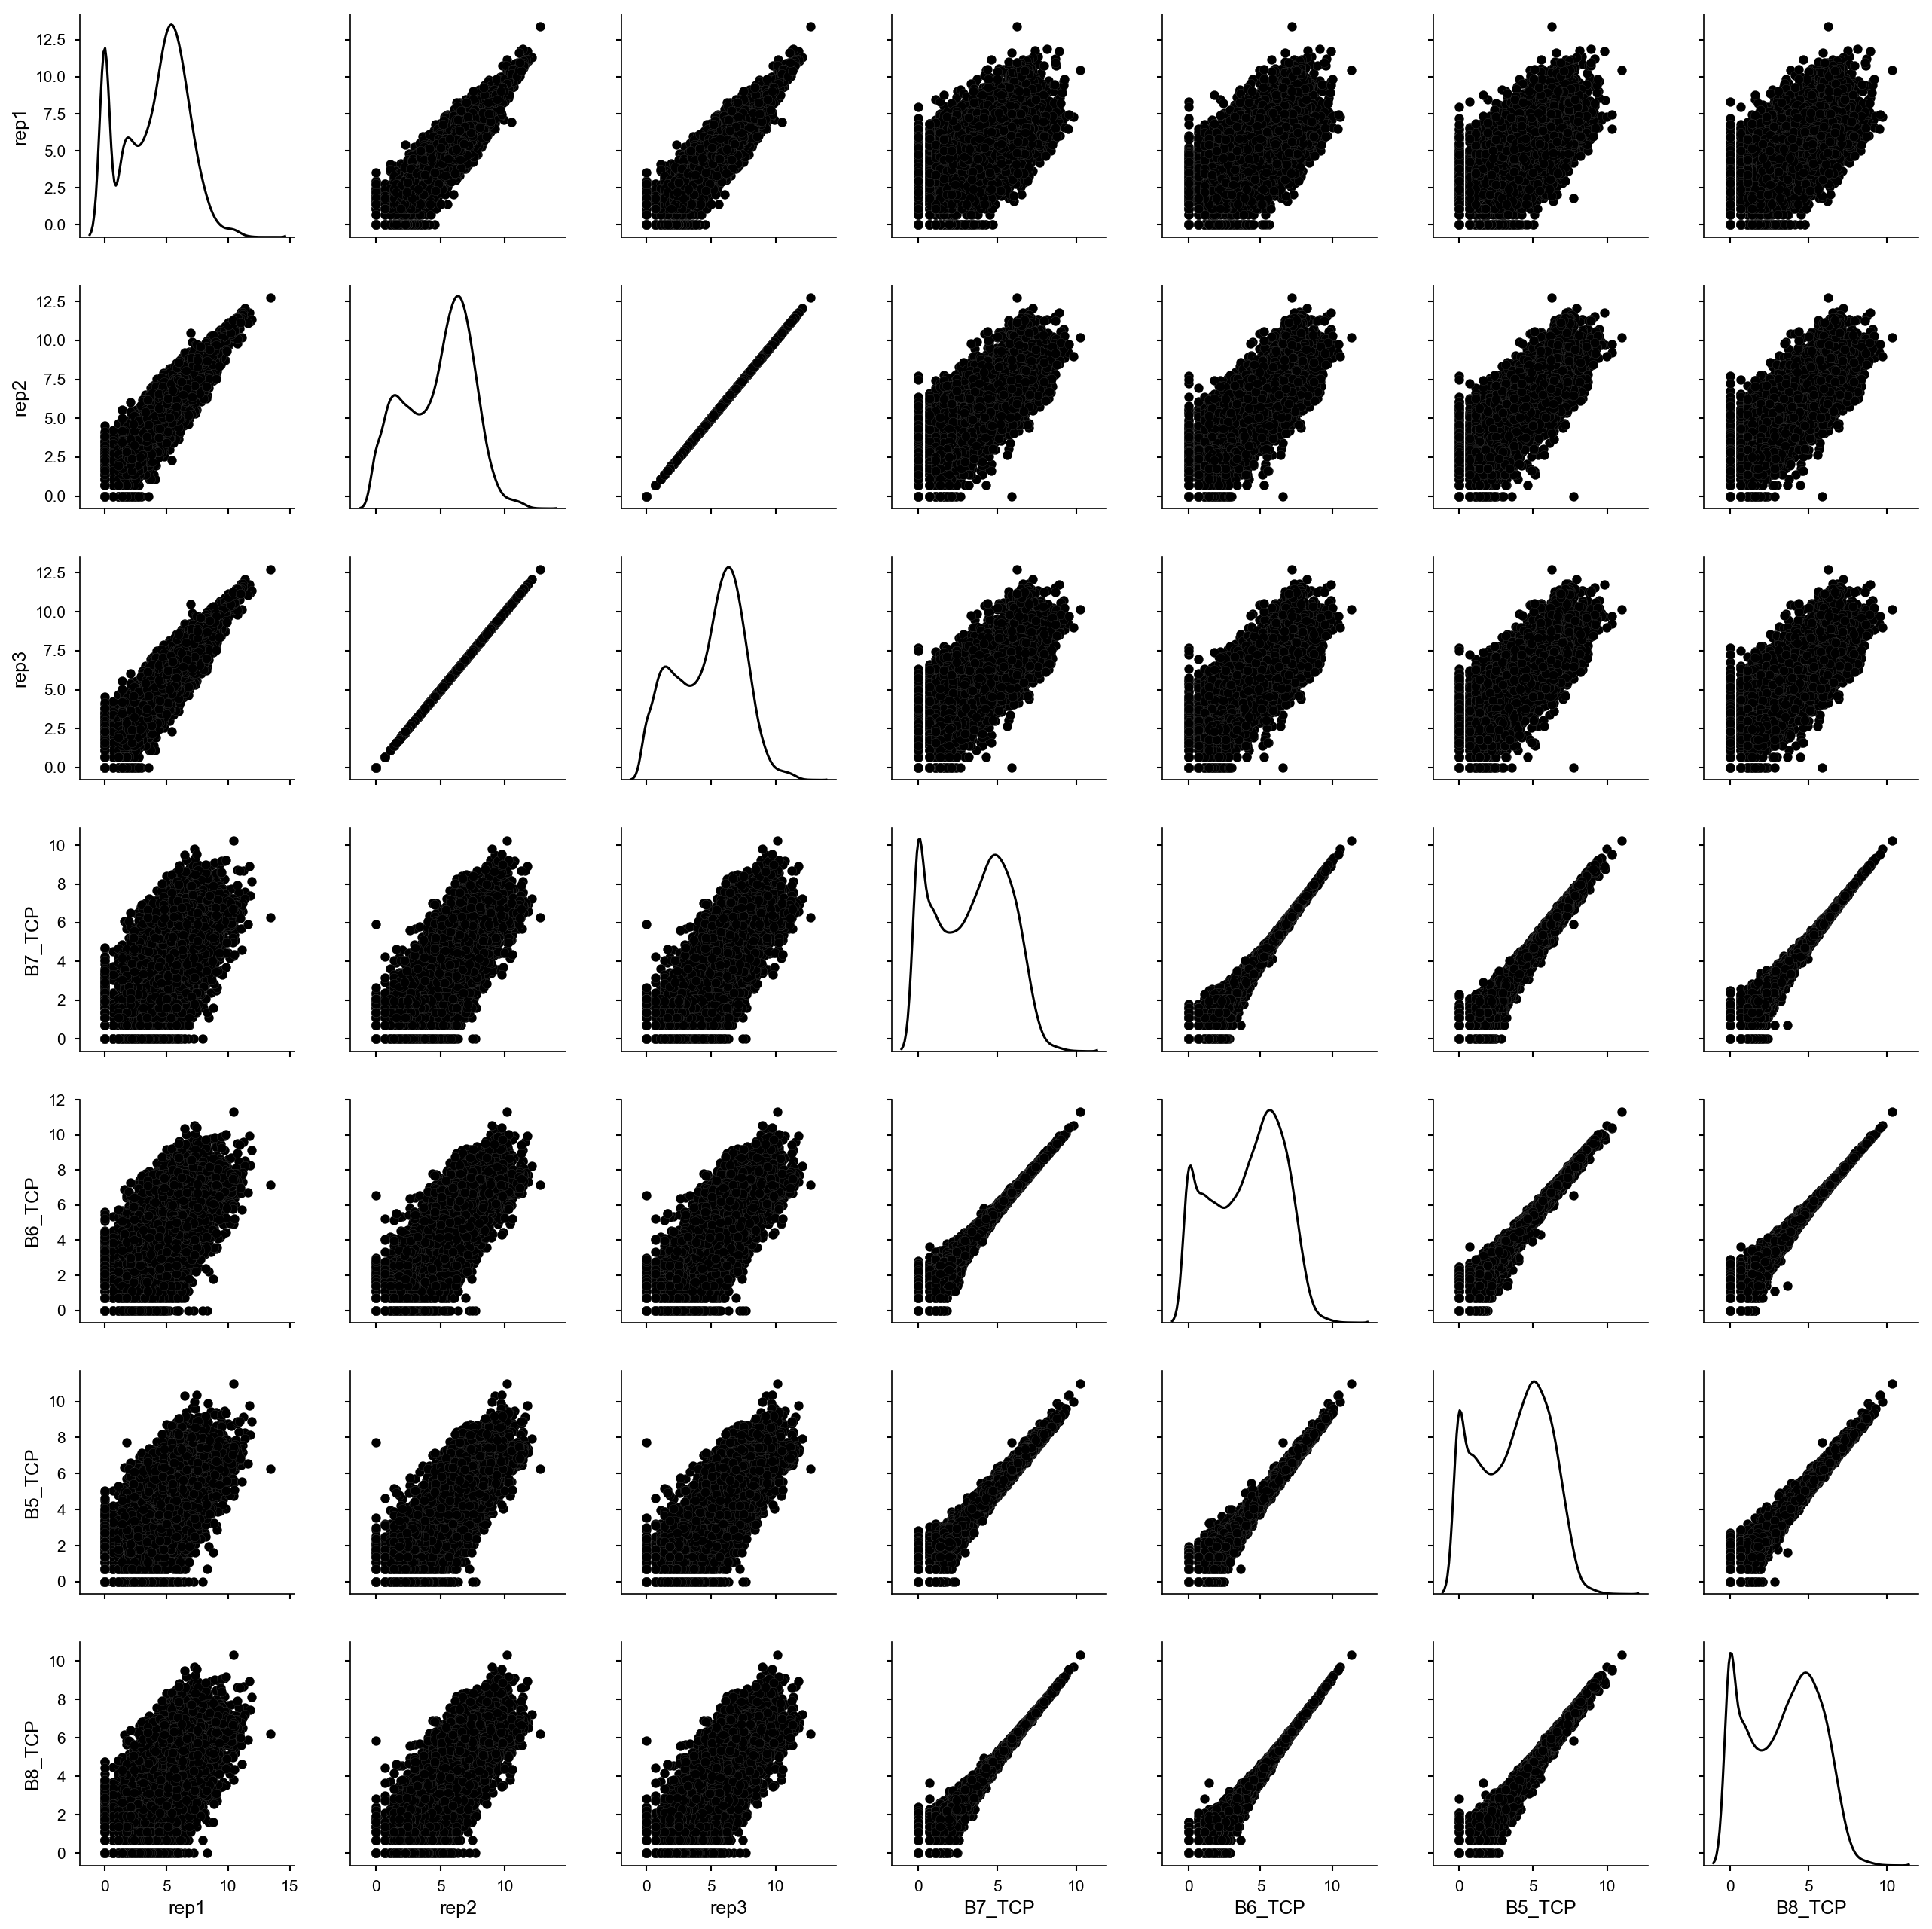

In [58]:
g = sns.pairplot(np.log1p(dat), plot_kws={'color': 'k'}, diag_kind='kde', diag_kws={'color': 'k'})